<a href="https://colab.research.google.com/github/alstondu/MAAI_COLAB/blob/main/COMP0124_MAAI_2022_Lab_1_Game_Theory_Public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP0124 MAAI Lab 1 Game Theory Basics

This lab work has two parts,
the normal form game and the cournot duopoly.

## Instructions
1.   To start this notebook, please duplicate this notebook at first:
  - Choose "File => Save a copy in Drive" and open/run it in Colab.
  - Or you can download the notebook and run it in your local jupyter notebook server.
2.   For the coding assignment and practice, please write your code at `### TODO ###` blocks or in a new cell. For analysis report, you are free to use as many blocks as you need.
3. If you have any questions, please contact TAs: [Minne Li](minne.li@cs.ucl.ac.uk), [Oliver Slumbers](o.slumbers@cs.ucl.ac.uk), [Xihan Li](xihan.li.20@ucl.ac.uk), [Xidong Feng](xidong.feng@cs.ucl.ac.uk), and [Mengyue Yang](m.yang@cs.ucl.ac.uk).

## Part I: Normal Form Games

#### Definition of a normal form game
Given sample pay off matrices,
$$
\mathbf{R}^1 = \left[\begin{matrix}
0 & 3 \\
1 &2
\end{matrix}\right]
\quad
\mathbf{R}^2 = \left[\begin{matrix}
3 & 2 \\
0 & 1
\end{matrix}\right],
$$


An $N$ player normal form game (a.k.a. Matrix Game/Stage Game) consists of:

*   A finite set of $N$ players.
*   Action set for the players: $\{\mathcal{A}_1, \mathcal{A}_2, \dots \mathcal{A}_N\}$
*   Payoff functions for the players: $u_i : \mathcal{A}_1 \times \mathcal{A}_2 \dots \times \mathcal{A}_N \to \mathbb{R}$

For example, given $N=2, \mathcal{A}_1 = \mathcal{A}_2 = \{1,2\}$, we can write the payoff function in the matrix form as follows:
$$
\mathbf{R}^1 = \left[\begin{matrix}
r^1_{11} & r^1_{12} \\
r^1_{21} & r^1_{22}
\end{matrix}\right]
\quad
\mathbf{R}^2 = \left[\begin{matrix}
r^2_{11} & r^2_{12} \\
r^2_{21} & r^2_{22}
\end{matrix}\right].
$$

If the player 1 chooses action $i$ and the player 2 chooses action $j$, then the player 1 and player2 receive the rewards $r^1_{ij}$ and $r^2_{ij}$ respectively.

Then, we can use $\pi_1 = \alpha\in [0,1] $ to represent the strategy for player 1, where $\alpha$ corresponds to the probability of player 1 selecting the first action (action 1), and $1-\alpha$ is the probability of choosing the second action (action 2). Similarly, we use $\pi_2 = \beta$ to be the strategy for player 2.

Given the pair of strategies $(\alpha, \beta)$, we can have the **expected payoffs** for two players. Denote $V^1(\alpha, \beta)$ and $V^2(\alpha, \beta)$ as the expected payoffs for two players respectively:

$$
\begin{aligned} V^{1}(\alpha, \beta) &=\alpha \beta r^1_{11}+\alpha(1-\beta) r^1_{12}+(1-\alpha) \beta r^1_{21}+(1-\alpha)(1-\beta) r^1_{22} \\ &=u^1 \alpha \beta+\alpha\left(r^1_{12}-r^1_{22}\right)+\beta\left(r^1_{21}-r^1_{22}\right)+r^1_{22} \ \ \ \ (1)\end{aligned}      
$$  
$$
\begin{aligned} V^{2}(\alpha, \beta) &=\alpha \beta r^2_{11}+\alpha(1-\beta) r^2_{12}+(1-\alpha) \beta r^2_{21}+(1-\alpha)(1-\beta) r^2_{22} \\ &=u^2 \alpha \beta+\alpha\left(r^2_{12}-r^2_{22}\right)+\beta\left(r^2_{21}-r^2_{22}\right)+r^2_{22}\ \ \ \ (2) \end{aligned}  
$$

where

$$
\begin{aligned} u^1 &=r^1_{11}-r^1_{12}-r^1_{21}+r^1_{22} \ \ \ \ (3)\\  u^2 &=r^2_{11}-r^2_{12}-r^2_{21}+r^2_{22}.\ \ \ (4)\end{aligned}  
$$

In this exercise, you will be given different types of normal form games. You will try to find the expected payoffs and Nash Equilibria (if existed) for these games.

#####Q1: Complete the code to calculate the expected payoff for a given joint policy (e.g. create a function where the inputs are the polices and payoff matrix and the output is the expect payoff)

In [ ]:
import numpy as np
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

#  implement Eqs. (3) and (4)
def U(payoff):
    ########### TODO: Compute u ###########
    u = payoff[0][0] - payoff[0][1] - payoff[1][0] + payoff[1][1]
    ########### END TODO ##################
    return u


# expected payoff Eqs (1) and (2)
def V(alpha, beta, payoff):
    ########### TODO: Compute expected payoff of given #########
    #########     strategies alpha and beta ####################
    u = U(payoff)
    v = u*alpha*beta + alpha*(payoff[0][1] - payoff[1][1]) + beta*(payoff[1][0] - payoff[1][1]) + payoff[1][1]
    ########### END TODO #######################################
    return v


payoff_1 = np.array([[0, 3],
                     [1, 2]]) # Example payoff matrix for player 1
payoff_2 = np.array([[3, 2],
                     [0, 1]]) # Example payoff matrix for player 2

pi_alpha = 0. # initial strategy for player 1
pi_beta = 0.9 # initial strategy for player 2

u_alpha = U(payoff_1)
u_beta = U(payoff_2)
v_1 = V(pi_alpha, pi_beta, payoff_1)
v_2 = V(pi_alpha, pi_beta, payoff_2)
print('Expected payoff for agent 1:', v_1, '; agent 2:', v_2)

Expected payoff for agent 1: 1.1 ; agent 2: 0.09999999999999998


#### Find Nash Equilibria for a Coordination Game: Watching Movies

**Watching Movies Game:** Two friends must decide what movie to watch at the cinema. Alice would like to watch a sport movie and Bob would like to watch a comedy. Importantly, they would both rather spend their evening together than apart. There are four possible outcomes:


1.   Alice watches a sport movie, Bob watches a comedy: Alice receives a reward of 1 and Bob a reward of 1.
2.   Alice watches a comedy, Bob watches a sport movie: Alice receives a reward of 0 and Bob a reward of 0.
3.   Alice and Bob both watch a sport movie: Alice receives a reward of 3 and Bob a reward of 2.
4.   Alice and Bob both watch a comedy: Alice receives a reward of 2 and Bob a reward of 3.

#####Q2: Define the payoff matrix and calculate the expected payoff for Alice and Bob using the function implemented in Q1.

In [ ]:
########### TODO: Payoff matrix for the coordination game ###########
payoff_Alice = np.array([[3, 1],
                     [0, 2]])
payoff_Bob = np.array([[2, 1],
                     [0, 3]])
########### END TODO ################################################

pi_Alice = 0. # initial policy for player 1
pi_Bob = 0.9 # initial policy for player 2

v_Alice = V(pi_Alice, pi_Bob, payoff_Alice)
v_Bob = V(pi_Alice, pi_Bob, payoff_Bob)
print('Expected payoff for Alice:', v_Alice, '; Bob:', v_Bob)

Expected payoff for Alice: 0.19999999999999996 ; Bob: 0.2999999999999998


#####Q3: Find Nash equilibria for this game through the utility plot (The Upper-envelope method).

In a two player game, $(\pi_{Alice}, \pi_{Bob})$ is a Nash equilibria if $\pi_{Alice}$ is a best response to $\pi_{Bob}$ and $\pi_{Bob}$ is a best response to $\pi_{Alice}$. Given that the utility of playing $\pi_{Alice}$ against $\pi_{Bob}$ is linear, we can find the Nash equilibria for this game through the utility plot, i.e., a plot of $V^{Alice}(\pi_{Alice}, \pi_{Bob})$ as a function of $\pi_{Bob}$ for $\pi_{Alice} \in \{0, 1\}$, and vice versa.

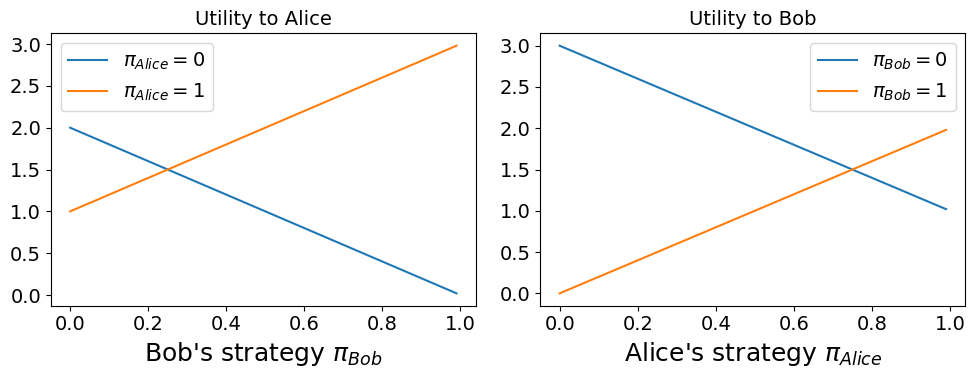

In [ ]:
import matplotlib.pyplot as plt
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

plt_index = np.round(np.arange(0, 1, 0.01), 3)

########### TODO: Calculate V^{Alice} as a function of \pi_{Bob} ###########
utility_Alice_0 = V(0, plt_index, payoff_Alice)
utility_Alice_1 = V(1, plt_index, payoff_Alice)
########### END TODO ###########
ax[0].plot(plt_index, utility_Alice_0, label="$\pi_{Alice} = 0$")
ax[0].plot(plt_index, utility_Alice_1, label="$\pi_{Alice} = 1$")
ax[0].legend()
ax[0].set_xlabel("Bob's strategy $\pi_{Bob}$")
ax[0].set_title("Utility to Alice")

########### TODO: Calculate V^{Bob} as a function of \pi_{Alice} ###########
utility_Bob_0 = V(plt_index, 0, payoff_Bob)
utility_Bob_1 = V(plt_index, 1, payoff_Bob)
########### END TODO ###########
ax[1].plot(plt_index, utility_Bob_0, label="$\pi_{Bob} = 0$")
ax[1].plot(plt_index, utility_Bob_1, label="$\pi_{Bob} = 1$")
ax[1].legend()
ax[1].set_xlabel("Alice's strategy $\pi_{Alice}$")
ax[1].set_title("Utility to Bob")

plt.tight_layout()
plt.show()


##### Q4: Check your answer by running the [Support Enumeration](https://nashpy.readthedocs.io/en/stable/how-to/solve-with-support-enumeration.html) method of finding NEs (provided in the [NashPy](https://nashpy.readthedocs.io/en/stable/index.html) package).

In [ ]:
!pip -q install nashpy
import nashpy as nash
game = nash.Game(payoff_Alice, payoff_Bob)
equilibria = game.support_enumeration()
print("Nash Equilibrium for the Watching Movies:")
for idx, eq in enumerate(equilibria):
    print('NE', idx + 1, ': pi_Alice:', eq[0][0], ', pi_Bob', eq[1][0])

Nash Equilibrium for the Watching Movies:
NE 1 : pi_Alice: 1.0 , pi_Bob 1.0
NE 2 : pi_Alice: 0.0 , pi_Bob 0.0
NE 3 : pi_Alice: 0.75 , pi_Bob 0.25


#### Find Nash Equilibria for a zero-sum game: Matching Pennies

A two player normal form game with payoff matrices $\mathbf{R}^1, \mathbf{R}^2$ is called zero sum if and only if:
$$
\mathbf{R}^1 = -\mathbf{R}^2.
$$

**Matching Pennies**: Consider two players who can choose to display a coin either Heads facing up or Tails facing up. If both players show the same face then player 1 wins, if not then player 2 wins. Winning corresponds to a numeric value of 1 and losing a numeric value of -1.

#####Q5: Define the payoff matrix and calculate the expected payoff for both players as before.

In [ ]:
########### TODO: Payoff matrix for the Matching Pennies ###########
payoff_1 = np.array([[1, -1],
                     [-1, 1]])
payoff_2 = np.array([[-1, 1],
                     [1, -1]])
########### END TODO ################################################

pi_1 = 0. # initial policy for player 1
pi_2 = 0 # initial policy for player 2

v_1 = V(pi_1, pi_2, payoff_1)
v_2 = V(pi_1, pi_2, payoff_2)
print('Expected payoff for player 1:', v_1, '; player 2:', v_2)

Expected payoff for player 1: 1.0 ; player 2: -1.0


#####Q6: Plot the expected payoffs for the two players, and find Nash equilibria for this game by identifying the [saddle point](https://en.wikipedia.org/wiki/Saddle_point) (one player maximizes it, while its opponent intends to minimize it).

For example, you can plot a 3-d surface of $V^{1}(\pi_{1}, \pi_{2})$ as a function of $\pi_{1}$ and $\pi_{2}$, and vice versa.

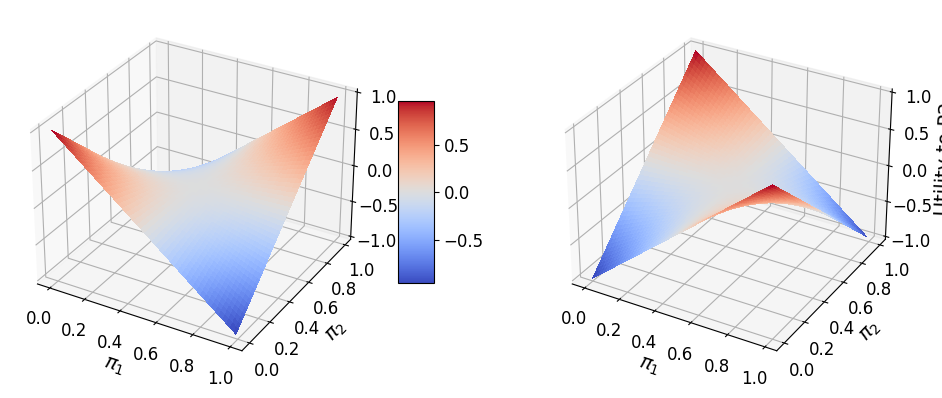

[[ 1.      0.98    0.96   ... -0.94   -0.96   -0.98  ]
 [ 0.98    0.9604  0.9408 ... -0.9212 -0.9408 -0.9604]
 [ 0.96    0.9408  0.9216 ... -0.9024 -0.9216 -0.9408]
 ...
 [-0.94   -0.9212 -0.9024 ...  0.8836  0.9024  0.9212]
 [-0.96   -0.9408 -0.9216 ...  0.9024  0.9216  0.9408]
 [-0.98   -0.9604 -0.9408 ...  0.9212  0.9408  0.9604]]


In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(1, 2, figsize=(10, 4), subplot_kw={"projection": "3d"})

# Make data.
plt_index = np.round(np.arange(0, 1, 0.01), 3)
X, Y = np.meshgrid(plt_index, plt_index)
########### TODO: Calculate V^{1}(\pi_{1}, \pi_{2}) ###########
Z_a = V(X, Y, payoff_1)
Z_b = V(X, Y, payoff_2)
########### END TODO ################################################

# Plot the surface.
surf = ax[0].plot_surface(X, Y, Z_a, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf_2 = ax[1].plot_surface(X, Y, Z_b, cmap=cm.coolwarm,
                         linewidth=0, antialiased=False)

# Customize the z axis.
for ax_ in ax:
    ax_.set_zlim(-1, 1)
    ax_.set_xlabel("$\pi_{1}$")
    ax_.set_ylabel("$\pi_{2}$")
ax[0].set_zlabel('Utility to P1')
ax[1].set_zlabel('Utility to P2')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()
print(Z_a)

Complete an algorithm to find all saddle points in a Matrix.

In [ ]:
def allSaddles(matrix):
    allSaddles = []

    ########### TODO: Find all saddle points in matrix ###########
    # Iterate through each element in the matrix
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            element = matrix[i][j]
            row = matrix[i, :]
            column = matrix[:, j]

            # Check for saddle point conditions
            if element == min(row) and element == max(column) or element == max(row) and element == min(column):
                allSaddles.append((i, j))
    ########### END TODO ################################################


    return allSaddles

p1_sp = allSaddles(Z_a)
print('Saddle points for P1: ')
for idx, sp in enumerate(p1_sp):
    print('SP', idx + 1, ': pi_1:', plt_index[sp[0]], ', pi_2', plt_index[sp[1]])

p2_sp = allSaddles(Z_b)
print('Saddle points for P2: ')
for idx, sp in enumerate(p2_sp):
    print('SP', idx + 1, ': pi_1:', plt_index[sp[0]], ', pi_2', plt_index[sp[1]])

Saddle points for P1: 
SP 1 : pi_1: 0.5 , pi_2 0.5
Saddle points for P2: 
SP 1 : pi_1: 0.5 , pi_2 0.5


##### Q7: Check your answer by running the Support Enumeration method through the NashPy package.

In [ ]:
!pip -q install nashpy
import nashpy as nash
game = nash.Game(payoff_1, payoff_2)
equilibria = game.support_enumeration()
print("Nash Equilibrium for the Matching Pennies:")
for idx, eq in enumerate(equilibria):
    print('NE', idx + 1, ': pi_1:', eq[0][0], ', pi_2', eq[1][0])

Nash Equilibrium for the Matching Pennies:
NE 1 : pi_1: 0.5 , pi_2 0.5


#### Find Nash Equilibria through the Best Response Curve: Hawk Dove

**Hawk Dove Game**: Suppose two birds of prey must share a limited resource. The birds can act like a hawk or a dove. Hawks always act aggressively over the resource to the point of exterminating another hawk (both hawks get a utility value of 0) and/or take a majority of the resource from a dove (the hawk gets a utility value of 3 and the dove a utility value of 1). Two doves can share the resource (both getting a utility value of 2).

#####Q8: Define the payoff matrix and calculate the expected payoff for the birds as before.

In [ ]:
########### TODO: Payoff matrix for the Matching Pennies ###########
payoff_1 = np.array([[0, 3],
                    [1, 2]])
payoff_2 = np.array([[0, 1],
                    [3, 2]])
########### END TODO ################################################

pi_1 = 0 # initial policy for bird 1
pi_2 = 0.9 # initial policy for bird 2

v_1 = V(pi_1, pi_2, payoff_1)
v_2 = V(pi_1, pi_2, payoff_2)
print('Expected payoff for bird 1:', v_1, '; bird 2:', v_2)

Expected payoff for bird 1: 1.1 ; bird 2: 2.9


#####Q9: Find Nash equilibria for this game through finding intersections on the best response correspondences plot.

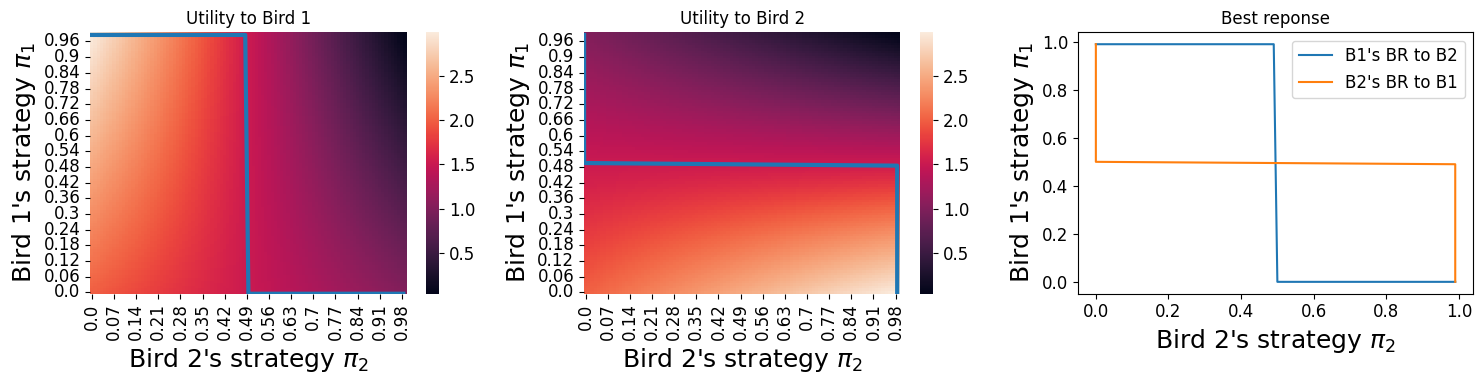

In [ ]:
import seaborn as sns
import pandas as pd
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

plt_gap = 100
plt_index = np.round(np.arange(0, 1, 1 / plt_gap), 3)
X, Y = np.meshgrid(plt_index, plt_index)
########### TODO: Calculate V^{1}(\pi_{1}, \pi_{2}) ###########
Z_a = V(X, Y, payoff_1)
Z_b = V(X, Y, payoff_2)
########### END TODO ################################################
for Z_, ax_ in zip([Z_a, Z_b], ax):
    df = pd.DataFrame(np.transpose(Z_), index=plt_index, columns=plt_index)
    sns.heatmap(df, ax=ax_)
    ax_.invert_yaxis()
    ax_.set_xlabel("Bird 2's strategy $\pi_{2}$")
    ax_.set_ylabel("Bird 1's strategy $\pi_{1}$")

########### TODO: Calculate the best response curve ###########
B1_BR_to_B2 = [np.argmax(Z_line) for Z_line in Z_a]
B2_BR_to_B1 = [np.argmax(Z_line) for Z_line in np.transpose(Z_b)]
########### END TODO ################################################
ax[0].plot(plt_index*plt_gap, B1_BR_to_B2, linewidth=3)
ax[0].set_title('Utility to Bird 1')
ax[1].plot(B2_BR_to_B1, plt_index*plt_gap, linewidth=3)
ax[1].set_title('Utility to Bird 2')

ax[2].plot(plt_index, np.array(B1_BR_to_B2) / plt_gap, label="B1's BR to B2")
ax[2].plot(np.array(B2_BR_to_B1) / plt_gap, plt_index, label="B2's BR to B1")
ax[2].set_title('Best reponse')
ax[2].set_xlabel("Bird 2's strategy $\pi_{2}$")
ax[2].set_ylabel("Bird 1's strategy $\pi_{1}$")
ax[2].legend(loc=1)

plt.tight_layout()
plt.show()

##### Q10: Check your answer by running support enumeration through the NashPy package.

In [ ]:
!pip -q install nashpy
import nashpy as nash
game = nash.Game(payoff_1, payoff_2)
equilibria = game.support_enumeration()
print("Nash Equilibrium for the Hawk Dove:")
for idx, eq in enumerate(equilibria):
    print('NE', idx + 1, ': pi_1:', eq[0][0], ', pi_2', eq[1][0])

Nash Equilibrium for the Hawk Dove:
NE 1 : pi_1: 1.0 , pi_2 0.0
NE 2 : pi_1: 0.0 , pi_2 1.0
NE 3 : pi_1: 0.5 , pi_2 0.5


## Part II: Cournot Duopoly

Cournot Duopoly is a classic static game that models the imperfect competition in which multiple firms compete in price and production to capture market share.
Since the firms' actions are continuous variables, the game is a continuous action setting.
It is a **nonzero-sum game** (neither team-based nor zero-sum) which represents a challenge for current MARL methods.

Let $a_i\in [0,A_i]$ represents the action for agent $i\in\{1,2\ldots, N\}:=\mathcal{N}$,
where $A_i\in \mathbb{R}_{>0}$.
Each agent $i$'s reward (profit) is
$$
R_i(a_i,a_{-i})=g_i(a_i,a_{-i}) - w_i(a_i), \ \ \ \  (5)
$$
where $g_i(a_i,a_{-i})$ is the revenue of agent $i$ and $w_i(a_i)$ is the cost to agent $i$ of taking action $a_i$.
In this market scenario, we have $g_i = a_i * P(a_1 + \dots + a_N)$, where $P(a_i,a_{-i})$ is the market price of the production and is a decreasing function when it is positive: if the agents' total output increases, then the price decreases (unless it is already zero).

##### Q11: Set up Cournot Duopoly Game.

Suppose that
$$
g_i=a_i(\alpha -\beta\sum_{j\in\mathcal{N}}a_j),
w_i (a_i)=\gamma a_i.
$$
We choose $A_i=1.0, \forall i\in\mathcal{N}$ and $\alpha=1.5, \beta=1.0, \gamma= 0.5$.

In [ ]:
import numpy as np
from copy import deepcopy

alpha = 1.5
beta = 1.0
gamma = 0.5
def payoff_n_cournot(action_n, i):
            """
            Define the payoff function R_i(a_i,a_{-i}).
            :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
            :param i: agent index
            :return: R_i(a_i,a_{-i})
            """
            ########### TODO: Compute R_i(a_i,a_{-i})  ###########
            #  implement Eqs. (5)
            r = action_n[i]*(alpha - beta*np.sum(action_n)) - gamma*action_n[i]
            ########### END TODO ############################
            return r

##### Q12: Plot the utilities of agent 1 and agent 2 given their actions.

1.   A plot of $V^{1}(a_{1}, a_{2})$ as a function of $a_{1}$ for $a_{2} = 0.2$.
2.   A plot of $V^{2}(a_{1}, a_{2})$ as a function of $a_{2}$ for $a_{1} = 0.7$.

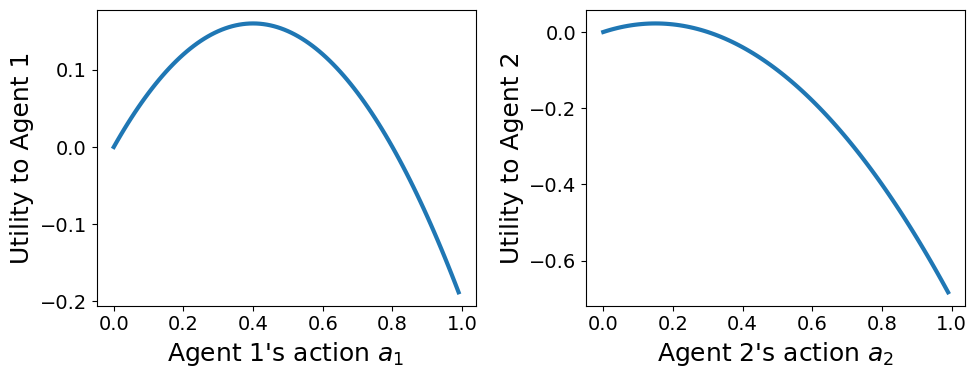

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

plt_index = np.round(np.arange(0, 1, 0.01), 3)
X = Y = plt_index

########### TODO: Calculate V^{1} and V^{2} using function in Q11 ###########
Z_a = []
Z_b = []

for a1 in plt_index:
  z_a = payoff_n_cournot([a1, 0.2], 0)
  Z_a.append(z_a)

for a2 in plt_index:
  z_b = payoff_n_cournot([0.7, a2], 1)
  Z_b.append(z_b)
########### END TODO ################################################

ax[0].plot(plt_index, Z_a, linewidth=3)
ax[0].set_xlabel("Agent 1's action $a_{1}$")
ax[0].set_ylabel("Utility to Agent 1")

ax[1].plot(plt_index, Z_b, linewidth=3)
ax[1].set_xlabel("Agent 2's action $a_{2}$")
ax[1].set_ylabel("Utility to Agent 2")

plt.tight_layout()
plt.show()

##### Q13: Plot the best response correspondences for agent 1 and agent 2 respectively and use them to identify the equilibrium.

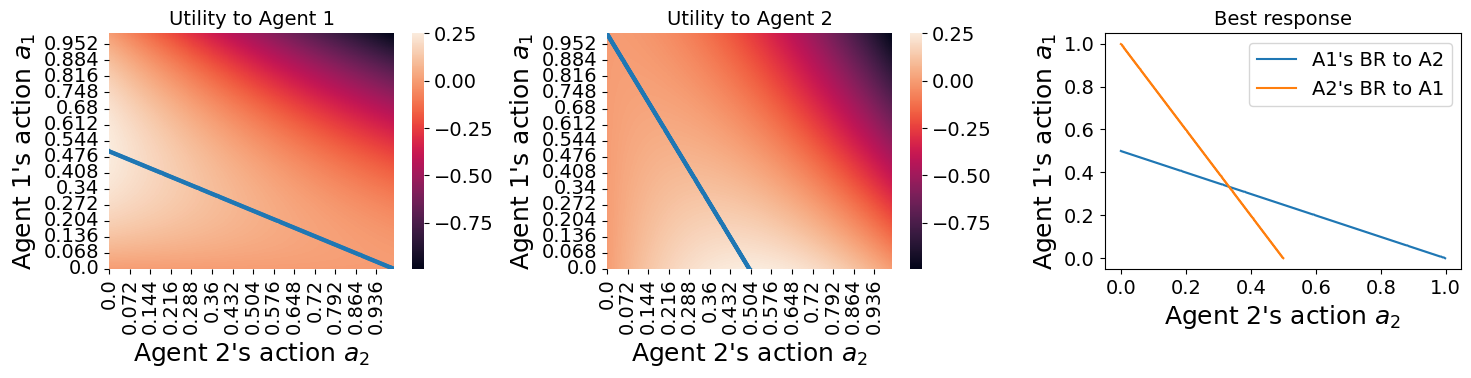

In [ ]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

plt_gap = 500
plt_index = np.round(np.arange(0, 1, 1/plt_gap), 3)
X, Y = np.meshgrid(plt_index, plt_index)
########### TODO: Calculate V^{1} and V^{2} ###########
# Initialize Z_a and Z_b as 2D NumPy arrays
Z_a = np.zeros((len(plt_index), len(plt_index)))
Z_b = np.zeros((len(plt_index), len(plt_index)))

for i, a1 in enumerate(plt_index):
    for j, a2 in enumerate(plt_index):
        # Calculate utility for each agent given the pair of actions
        Z_a[i, j] = payoff_n_cournot([a1, a2], 0)  # Utility for agent 1
        Z_b[i, j] = payoff_n_cournot([a1, a2], 1)  # Utility for agent 2
########### END TODO ################################################

for Z_, ax_ in zip([Z_a, Z_b], ax):
    df = pd.DataFrame(Z_, index=plt_index, columns=plt_index)
    sns.heatmap(df, ax=ax_)
    ax_.invert_yaxis()
    ax_.set_xlabel("Agent 2's action $a_{2}$")
    ax_.set_ylabel("Agent 1's action $a_{1}$")

########### TODO: Calculate the best response curve ###########
A1_BR_to_A2 = np.argmax(Z_a, axis=0)  # Best response of A1 to A2
A2_BR_to_A1 = np.argmax(Z_b, axis=1)  # Best response of A2 to A1
########### END TODO ################################################
ax[0].plot(plt_index*plt_gap, A1_BR_to_A2, linewidth=3)
ax[0].set_title('Utility to Agent 1')
ax[1].plot(A2_BR_to_A1, plt_index*plt_gap, linewidth=3)
ax[1].set_title('Utility to Agent 2')

ax[2].plot(plt_index, np.array(A1_BR_to_A2) / plt_gap, label="A1's BR to A2")
ax[2].plot(np.array(A2_BR_to_A1) / plt_gap, plt_index, label="A2's BR to A1")
ax[2].set_title('Best response')
ax[2].set_xlabel("Agent 2's action $a_{2}$")
ax[2].set_ylabel("Agent 1's action $a_{1}$")
ax[2].legend()

plt.tight_layout()
plt.show()